In [112]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from PIL import Image
from PIL import ImageDraw
plt.style.use({'figure.figsize':(10, 10)})
pd.set_option('max_rows', 300)

# Q-Table One

### Q-table One is used to void the obstacles automatically.
### Columns:Nearest|Near|Medium|Far
##### Columns register the states
### Rows:Up|Down|Turn_left_45 degree|Turn_right_45_degree
##### Rows register the actions

In [113]:
Epsilon_start=1
Epsilon_final=0.01
Decay_rate=0.000001#he dacaying rate of the Epsilon, the range of the epsilon is 0.01-1, initially it is 1.
Action_times=0 #Rigister the totality of the times of selecting actions, including the random selections and selection based on Q_Table
Velocity_tripod=0.289*40
Up_degree=np.array([-40,-20,0,20,40])
Left_degree=np.array([-60,-80,-100,-120])
Right_degree=np.array([60,80,100,120])
Robot_radium=40
Beta=0.9
Alpha=0.2

In [114]:
#Nearest(<50cm)||Near(50cm-130cm)||Medium(130cm-210cm)|Far(>210cm)
#Safe distance=1cm
Q_table1_states=np.array(['L0R0U0','L0R0U1','L0R0U2','L0R0U3',
                'L0R1U0','L0R1U1','L0R1U2','L0R1U3',
                'L0R2U0','L0R2U1','L0R2U2','L0R2U3',
                'L0R3U0','L0R3U1','L0R3U2','L0R3U3',
                'L1R0U0','L1R0U1','L1R0U2','L1R0U3',
                'L1R1U0','L1R1U1','L1R1U2','L1R1U3',
                'L1R2U0','L1R2U1','L1R2U2','L1R2U3',
                'L1R3U0','L1R3U1','L1R3U2','L1R3U3',
                'L2R0U0','L2R0U1','L2R0U2','L2R0U3',
                'L2R1U0','L2R1U1','L2R1U2','L2R1U3',
                'L2R2U0','L2R2U1','L2R2U2','L2R2U3',
                'L2R3U0','L2R3U1','L2R3U2','L2R3U3',
                'L3R0U0','L3R0U1','L3R0U2','L3R0U3',
                'L3R1U0','L3R1U1','L3R1U2','L3R1U3',
                'L3R2U0','L3R2U1','L3R2U2','L3R2U3',
                'L3R3U0','L3R3U1','L3R3U2','L3R3U3'])
Q_table1_actions=np.array(['Up','Down','Left_45D','Right_45D'])
Q_table1_actions_length=len(Q_table1_actions)
Q_table1_states_length=len(Q_table1_states)

In [115]:
Q_table_real=np.zeros((Q_table1_states_length,Q_table1_actions_length))
Q_table_real=pd.DataFrame(Q_table_real,columns=Q_table1_actions,index=Q_table1_states)
Q_table_real.head()

,Up,Down,Left_45D,Right_45D
L0R0U0,0.0,0.0,0.0,0.0
L0R0U1,0.0,0.0,0.0,0.0
L0R0U2,0.0,0.0,0.0,0.0
L0R0U3,0.0,0.0,0.0,0.0
L0R1U0,0.0,0.0,0.0,0.0


In [116]:
def Initial_Q_Table(LengthOfActions,LengthOfStates):
    Q_Table=np.zeros((LengthOfStates,LengthOfActions))
    print('***********************************************************')
    print("Succeed to initialize Q-Table!")
    print('***********************************************************')
    return Q_Table

In [117]:
def Draw_map1():
    im = Image.new("RGB", size=(2000,2000),color=(0,0,0)) 
    draw = ImageDraw.Draw(im,mode='RGB') 
    draw.rectangle((40,40,1960,1960),(255,255,255),(255,255,255)) 
    draw.rectangle((1500,1000,1650,1150),(0,0,0), (0,0,0)) 
    draw.ellipse((400,700,550,850),(0,0,0), (0,0,0)) 
    draw.rectangle((200,300,350,450),(0,0,0), (0,0,0)) 
    draw.ellipse((1500,500,1550,650),(0,0,0), (0,0,0)) 
    draw.ellipse((1200,1400,1350,1550),(0,0,0), (0,0,0)) 
    draw.rectangle((700,1200,850,1350),(0,0,0), (0,0,0)) 
    draw.ellipse((300,1600,450,1750),(0,0,0),(0,0,0)) 
    draw.rectangle((100,1100,250,1250),(0,0,0),(0,0,0)) 
    draw.ellipse((1100,250,1250,400),(0,0,0),(0,0,0)) 
    draw.polygon((900, 1070,1120, 1000,1150, 1100, 1100,1090,1050, 1200),(0,0,0),(0,0,0))
    draw.pieslice((750, 1700, 900, 1850), 0,180,(0,0,0),(0,0,0))
    draw.ellipse((900,550,1050,700),(0,0,0),(0,0,0))
    draw.ellipse((650,100,750,200),(0,0,0),(0,0,0)) 
    draw.rectangle((1700,130,1800,230),(0,0,0),(0,0,0))
    draw.polygon((150, 180, 200, 180, 250, 120, 230, 90, 130, 100),(0,0,0),(0,0,0))
#     draw.ellipse((1500-20,300-20,1500+20,300+20), (255,0,0), (255,0,0))
    return im
# im_show=Draw_map1()
# plt.imshow(im_show)
# plt.show()

In [118]:
def Draw_map2():
    im = Image.new("RGB", size=(2000,2000),color=(0,0,0)) 
    draw = ImageDraw.Draw(im,mode='RGB') 
    draw.rectangle((40,40,1960,1960),(255,255,255),(255,255,255))  
    draw.rectangle((1500,1000,1600,1100),(0,0,0),(0,0,0)) 
    draw.ellipse((400,700,600,900),(0,0,0),(0,0,0)) 
    draw.rectangle((200,300,500,600),(0,0,0),(0,0,0)) 
    draw.ellipse((1500,500,1800,800),(0,0,0),(0,0,0)) 
    draw.ellipse((1200,1400,1600,1800),(0,0,0),(0,0,0)) 
    draw.rectangle((700,1200,960,1460),(0,0,0),(0,0,0)) 
    draw.ellipse((300,1600,500,1800),(0,0,0),(0,0,0)) 
    draw.rectangle((100,1100,300,1300),(0,0,0),(0,0,0)) 
    draw.ellipse((1100,250,1300,450),(0,0,0),(0,0,0)) 
    draw.polygon((900, 1070,1120, 1000,1150, 1100, 1100,1090,1050, 1200),(0,0,0),(0,0,0))
    draw.pieslice((750, 1700, 950, 1900), 0,180,(0,0,0),(0,0,0))
    draw.ellipse((900,550,1050,700),(0,0,0),(0,0,0))
    draw.ellipse((650,100,850,300),(0,0,0),(0,0,0)) 
    draw.rectangle((1700,130,1900,330),(0,0,0),(0,0,0))
    draw.polygon((150, 180, 200, 180, 250, 120, 230, 90, 130, 100),(0,0,0),(0,0,0))
    return im
# im_show=Draw_map2()
# plt.imshow(im_show)
# plt.show()

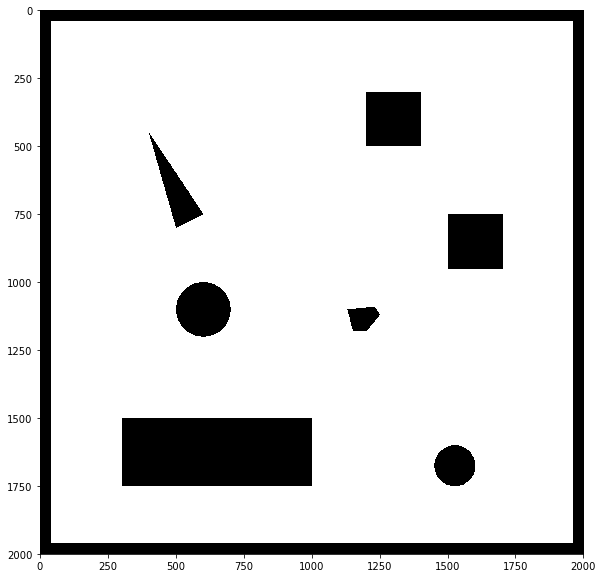

In [119]:
def Draw_map3():
    im = Image.new("RGB", size=(2000,2000),color=(0,0,0)) 
    draw = ImageDraw.Draw(im,mode='RGB') 
    draw.rectangle((40,40,1960,1960),(255,255,255),(255,255,255))  
    draw.polygon((1150, 1180, 1200, 1180, 1250, 1120, 1230, 1090, 1130, 1100),(0,0,0),(0,0,0))
    draw.polygon((400,450,600,750,500,800),(0,0,0),(0,0,0))
    draw.rectangle((1500,750,1700,950),(0,0,0),(0,0,0))
    draw.rectangle((300,1500,1000,1750),(0,0,0),(0,0,0))
    draw.ellipse((1450,1600,1600,1750),(0,0,0),(0,0,0))
    draw.rectangle((1200,300,1400,500),(0,0,0),(0,0,0))
    draw.ellipse((500,1000,700,1200),(0,0,0),(0,0,0))
    draw.ellipse((750,900,700,1200),(0,0,0),(0,0,0))
    return im
im_show=Draw_map3()
plt.imshow(im_show)
plt.show()

In [120]:
#Function Scan is used to detect the distance between obstacles and robot.
#Nearest(<50cm)||Near(50cm-130cm)||Medium(130cm-210cm)|Far(>210cm)
#Furthest scanning distance is defined as 290cm
def Scan(Current_x,Current_y,Angle,im):
    Distance_level=0
    Obstacle_distance=Robot_radium
    Obstacle_distance_x=Current_x+Obstacle_distance*np.cos(Angle/180*np.pi)
    Obstacle_distance_y=Current_y+Obstacle_distance*np.sin(Angle/180*np.pi)
    while(im.getpixel((Obstacle_distance_x,Obstacle_distance_y))!=(0,0,0) and Obstacle_distance<250):#getpixiel obtains the degree of Gray Scale
        Obstacle_distance+=5  #Search interval, can be changed
        Obstacle_distance_x=Current_x+Obstacle_distance*np.cos(Angle/180*np.pi)
        Obstacle_distance_y=Current_y+Obstacle_distance*np.sin(Angle/180*np.pi)
    if 0<=Obstacle_distance<90:
        Distance_level=0 #Nearear
    elif 90<=Obstacle_distance<170:
        Distance_level=1 #Near
    elif 170<=Obstacle_distance<250:
        Distance_level=2 #Medium
    else:
        Distance_level=3 #Far
    return Distance_level

In [121]:
def Is_Crash(Current_x,Current_y,im):
    Crash=False
    Degree=[-150,-120,-90,-60,-30,0,30,60,90,120,150,180]
    Distance=np.arange(0,50,5)
    for i in Distance:
        for j in Degree:
            x=Current_x+i*np.cos(j/180*np.pi)
            y=Current_y+i*np.sin(j/180*np.pi)
            if im.getpixel((x,y))==(0,0,0):
                Crash=True
                break
        if Crash==True:
                break
    return Crash

In [122]:
def Random_start(im):
    Angle=np.random.random()*360
    x,y=np.random.random(2)*2000
    while(Is_Crash(x,y,im)==True):
        x,y=np.random.random(2)*2000
    return x,y,Angle

In [123]:
def Direction_min_level(Degree,Current_x,Current_y,Current_angle,im):
    Level=[]
    Degree=Degree+Current_angle
    for i in Degree:
        Level.append(Scan(Current_x,Current_y,i,im))
    return min(Level)

In [124]:
def Output_state_index(Left_min,Right_min,Up_min):
    LRU=[]
    LRU.append(Left_min)
    LRU.append(Right_min)
    LRU.append(Up_min)
    return LRU[0]*16+LRU[1]*4+LRU[2]
# print(Output_state_index(Left_min,Right_min,Up_min))

In [125]:
#Choose_action is used to selection an action during the training process. It is based on the greedy strategy, if the random 
#chosen float(0-1) is inferior to current epsilon, robot choose random action to explore, if not, choose maximun Q value
#action based on Q Table, more precisely based on the action-state range
def Choose_action(Q_Table,Current_state,Action_times):
    Epsilon=Epsilon_final+(Epsilon_start-Epsilon_final)*np.exp(-1*Decay_rate*Action_times)
    State_action=Q_Table[Current_state,:]
    if(np.random.random()<Epsilon or np.all(State_action==[0])):
        Next_action=np.random.randint(Q_table1_actions_length)
    else:
        Next_action=np.argmax(State_action)
    return Next_action

In [126]:
def Output_next_state(Current_x,Current_y,Current_angle,Action,im):
    Reward=1
    Crash=False
    if Action==0:
        Next_x=Current_x+Velocity_tripod*np.cos(Current_angle/180*np.pi)
        Next_y=Current_y+Velocity_tripod*np.sin(Current_angle/180*np.pi)
        Next_angle=Current_angle
        if Is_Crash(Next_x,Next_y,im)==True:
            Crash=True
            Reward=-500
        else:
            Reward=2
    elif Action==1:
        Next_x=Current_x-Velocity_tripod*np.cos(Current_angle/180*np.pi)
        Next_y=Current_y-Velocity_tripod*np.sin(Current_angle/180*np.pi)
        Next_angle=Current_angle
        if Is_Crash(Next_x,Next_y,im)==True:
            Crash=True
            Reward=-500
    elif Action==2:
        Next_x=Current_x
        Next_y=Current_y
        Next_angle=Current_angle-45
    elif Action==3:
        Next_x=Current_x
        Next_y=Current_y
        Next_angle=Current_angle+45        
    return Next_x,Next_y,Next_angle,Reward,Crash

In [127]:
def Movement_plot(Vec_x,Vec_y):
    im=Image.new("RGB", size=(2000,2000),color=(0,0,0))
    draw = ImageDraw.Draw(im,mode='RGB')
    draw.rectangle((40,40,1960,1960),(255,255,255),(255,255,255))
    draw.rectangle((1500,1000,1650,1150),(0,0,0),(0,0,0)) 
    draw.ellipse((400,700,550,850),(0,0,0),(0,0,0)) 
    draw.rectangle((200,300,350,450),(0,0,0),(0,0,0)) 
    draw.ellipse((1500,500,1550,650),(0,0,0),(0,0,0)) 
    draw.ellipse((1200,1400,1350,1550),(0,0,0),(0,0,0)) 
    draw.rectangle((700,1200,850,1350),(0,0,0),(0,0,0)) 
    draw.ellipse((300,1600,450,1750),(0,0,0),(0,0,0)) 
    draw.rectangle((100,1100,250,1250),(0,0,0),(0,0,0)) 
    draw.ellipse((1100,250,1250,400),(0,0,0),(0,0,0)) 
    draw.polygon((900, 1070,1120, 1000,1150, 1100, 1100,1090,1050, 1200),(0,0,0),(0,0,0))
    draw.pieslice((750, 1700, 900, 1850), 0,180,(0,0,0),(0,0,0))
    draw.ellipse((900,550,1050,700),(0,0,0),(0,0,0))
    draw.ellipse((650,100,750,200),(0,0,0),(0,0,0)) 
    draw.rectangle((1700,130,1800,230),(0,0,0),(0,0,0))
    draw.polygon((150, 180, 200, 180, 250, 120, 230, 90, 130, 100),(0,0,0),(0,0,0))
    draw.ellipse((Vec_x[0]-40,Vec_y[0]-40, Vec_x[0]+40,Vec_y[0]+40),(0,255,0),(0,255,0)) 
    for i,j in zip(Vec_x[1:],Vec_y[1:]):
        draw.ellipse((i-40,j-40, i+40,j+40),(0,255,0),(0,255,0)) 
    return im

In [128]:
Q_table1_gait=np.loadtxt(r"E:\Graduate\python\Q_Table_notgait_finish\Q_Table1_notgait\Q_Table1_notgait_1.txt")
Q_table1_gait=pd.DataFrame(Q_table1_gait,columns=Q_table1_actions,index=Q_table1_states)

******************
0
******************
******************
20
******************
******************
40
******************
******************
60
******************
******************
80
******************
******************
100
******************
******************
120
******************
******************
140
******************
******************
160
******************
******************
180
******************
******************
200
******************
******************
220
******************
******************
240
******************
******************
260
******************
******************
280
******************
******************
300
******************
******************
320
******************
******************
340
******************
******************
360
******************
******************
380
******************
******************
400
******************
******************
420
******************
******************
440
******************
******************
460
*****************

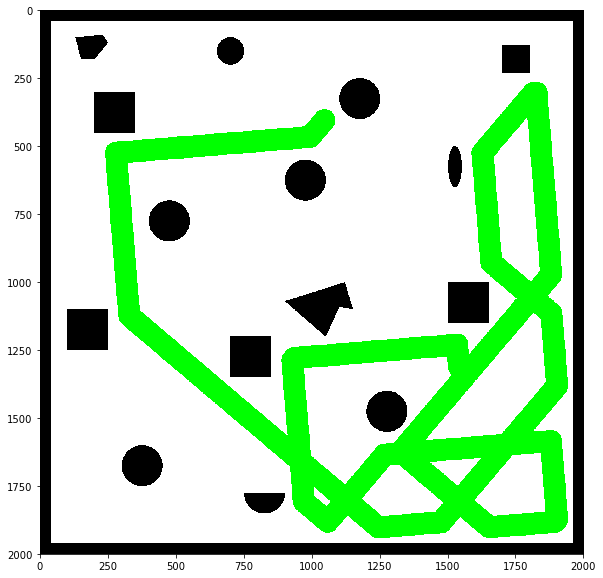

In [129]:
def test(Q_Table):
    Crash=False
    im=Draw_map1()
    Current_x,Current_y,Current_angle=Random_start(im)
    Test_time=0
    Vec_x=[]
    Vec_y=[]
    while Test_time<1000:
        Current_left_obstacle_level=Direction_min_level(Left_degree,Current_x,Current_y,Current_angle,im)
        Current_right_obstacle_level=Direction_min_level(Right_degree,Current_x,Current_y,Current_angle,im)
        Current_up_obstacle_level=Direction_min_level(Up_degree,Current_x,Current_y,Current_angle,im)
        Current_state=Output_state_index(Current_left_obstacle_level,Current_right_obstacle_level,Current_up_obstacle_level)
        Next_action=np.argmax(Q_Table[Current_state])
#         print("------------------------------------------------------------------------------------------")
#         print('Current_x=%f   Current_y=%f   Current_angle=%f'%(Current_x,Current_y,(Current_angle%360)))
        Next_x,Next_y,Next_angle,Reward,Crash=Output_next_state(Current_x,Current_y,Current_angle,Next_action,im)
#         print('Current_state=%d'%Current_state)
#         print('Next_action=%d'%Next_action)
#         print('Next_x=%f   Next_y=%f   Next_angle=%f'%(Next_x,Next_y,(Next_angle%360)))
        
        Vec_x.append(Current_x)
        Vec_y.append(Current_y)
        if Crash==True:
            print('Boom')
            print(Test_time)
            break
        else:
            if(Test_time%20==0):
                print("******************")
                print(Test_time)
                im_show=Movement_plot(Vec_x,Vec_y)
                print("******************")
                plt.imshow(im_show)
                plt.savefig((r"E:\Graduate\python\Q_Table_notgait_finish\Q_Table1_notgait\Pic\picture")+str(Test_time)+".png")
#                 plt.show()
        Current_x=Next_x
        Current_y=Next_y
        Current_angle=Next_angle
        Test_time+=1
test(Q_table1_gait.as_matrix())
# np.savetxt("Q_Table_try.txt",Q_Table_Final.as_matrix())
            

In [130]:
Q_Table_Final.iloc[30,:]

NameError: name 'Q_Table_Final' is not defined